# Glass Identification

# Project Description

The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide.

# Attribute Information

1. Id number: 1 to 214

2. RI: refractive inde
	 x3
3.	Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-1
	04
4.	Mg: Magnes
i5m
5.	Al: Alum
i6um
6.	Si: Si
l7con
7.	K: Pot
a8sium
8.	Ca: 
C9lcium
9.	Ba
:10arium
10.
	11: Iron
11.	Type of glass: (class ttribute)


1- building_windows_float_processed

2- building_windows_non_float_processed

3- vehicle_windows_float_processed

4- vehicle_windows_non_float_processed (none in this database)

5- containers

6- tableware

7- headlamps

There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7).

# Predict

Type of glass

# Dataset Link

https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Glass%20Identification/Glass%20Identification.csv

In [13]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import GridSearchCV, cross_val_score,RandomizedSearchCV,train_test_split
from sklearn.preprocessing import StandardScaler,RobustScaler,LabelEncoder,QuantileTransformer,PowerTransformer,MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier,ExtraTreesClassifier
from scipy.stats import zscore,boxcox
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import FactorAnalysis
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,recall_score,precision_score,auc,roc_curve,RocCurveDisplay,r2_score
from imblearn.over_sampling import SMOTE

In [15]:
#Import the data
glassdf=pd.read_csv(r'C:\Users\KIRUTHIKA\OneDrive\Documents\PG Program in Data Science Machine Learning and Neural Network\Internship\Datasets\Glass Identification.csv',names=['Id number','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type of Glass'])
glassdf.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [17]:
glassdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id number      214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of Glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [19]:
glassdf.shape

(214, 11)

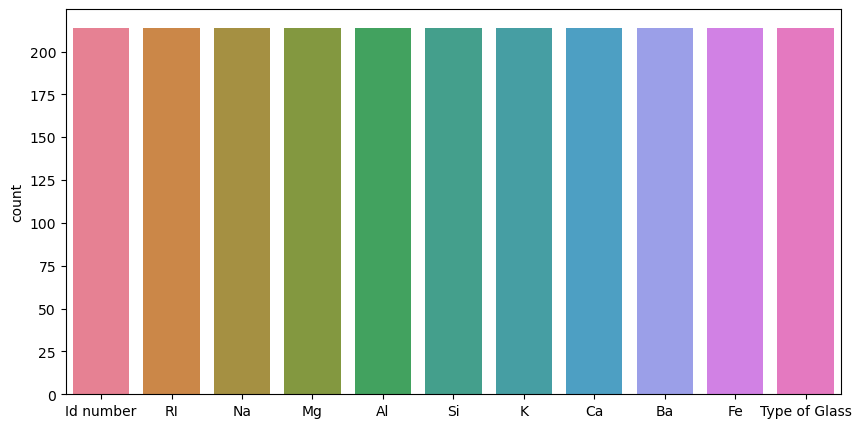

In [21]:
#There are 214 observations in the dataset
plt.figure(figsize=(10,5))
sns.countplot(glassdf)
plt.show()

In [23]:
glassdf.isnull().sum()

Id number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of Glass    0
dtype: int64

In [25]:
glassdf.duplicated().sum()

0

In [27]:
glassdf.describe()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


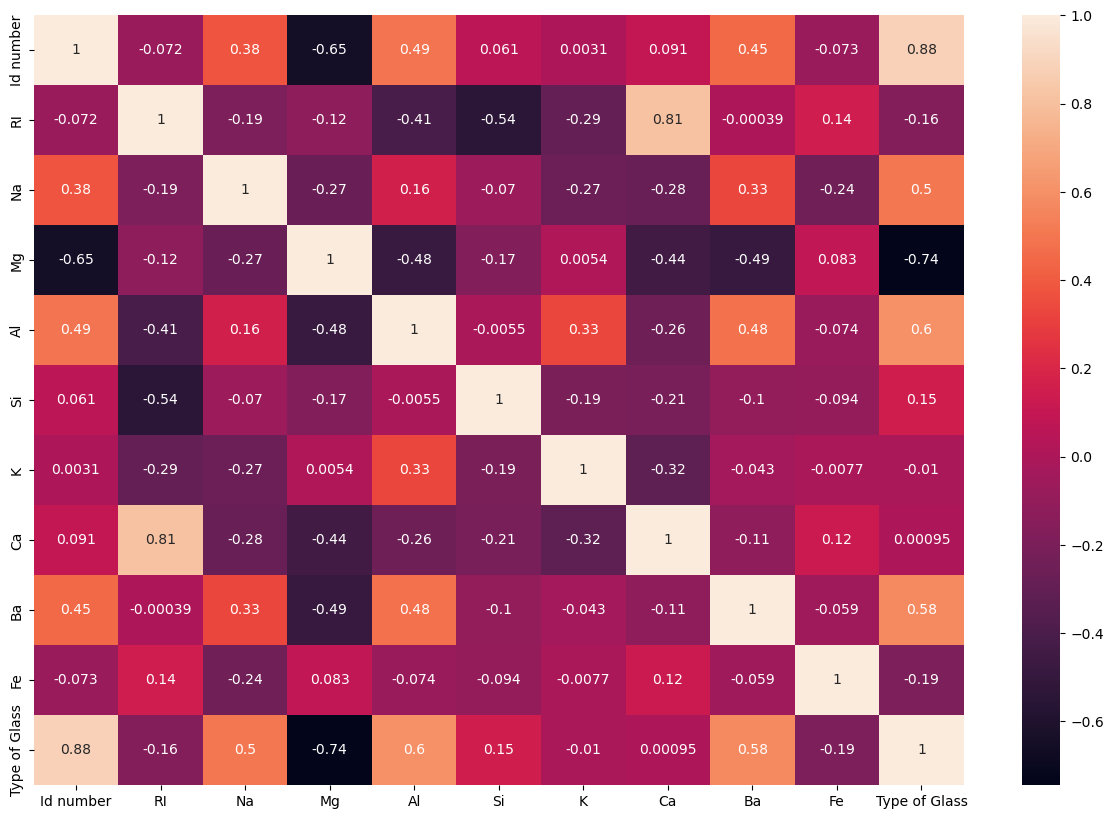

In [29]:
plt.figure(figsize=(15,10))
sns.heatmap(glassdf.corr(),annot=True)
plt.show()

In [31]:
glassdf.drop(columns='Id number',axis=1,inplace=True)

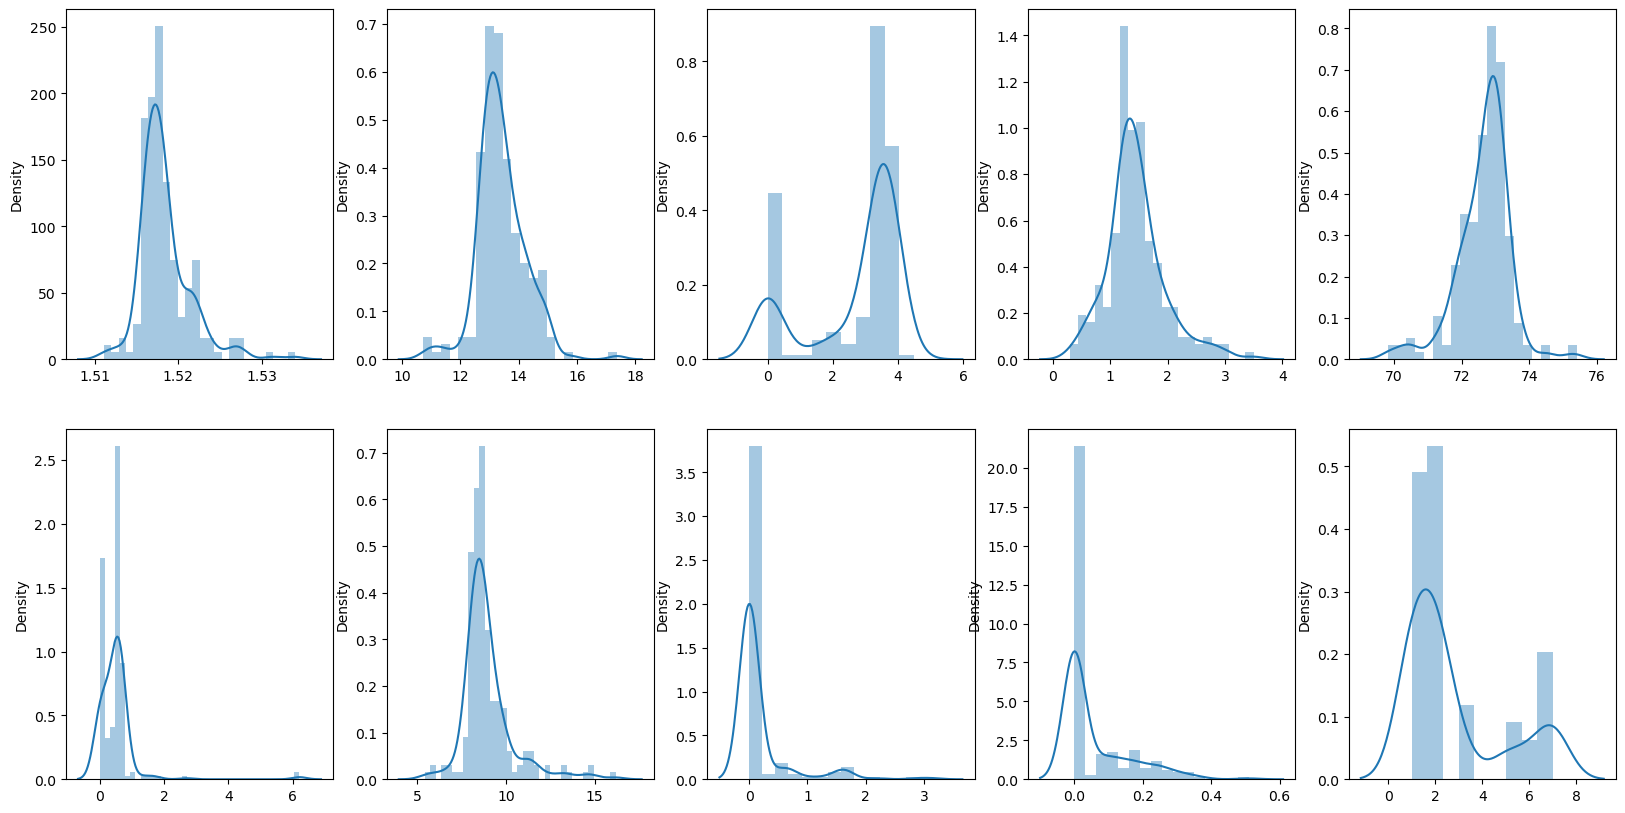

In [33]:
#check the skewness in the dataset using distplot
plt.figure(figsize=(20,10))
p=1
for i in glassdf:
    if p<=10:
        plt.subplot(2,5,p)
        sns.distplot(glassdf[i].values,kde=True)
    p=p+1
plt.show()

In [35]:
glassdf.skew()

RI               1.625431
Na               0.454181
Mg              -1.152559
Al               0.907290
Si              -0.730447
K                6.551648
Ca               2.047054
Ba               3.416425
Fe               1.754327
Type of Glass    1.114915
dtype: float64

In [37]:
glassdftransform=glassdf.drop(columns='Type of Glass',axis=1)

In [39]:
glasstype=glassdf['Type of Glass']

In [41]:
transform=PowerTransformer()
tramsform_data=transform.fit_transform(glassdftransform)

In [43]:
#create df
transformdf=pd.DataFrame(tramsform_data,columns=glassdftransform.columns)
transformdf.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,7.285839e-17,0.317061,1.876273,-0.662630,-1.138642,-1.289781,-0.010654,-0.45489,-0.680015
1,-2.081668e-17,0.616577,0.668163,-0.077498,0.044314,0.274843,-0.884532,-0.45489,-0.680015
2,-5.898060e-17,0.183344,0.608046,0.291075,0.400267,0.018565,-0.938251,-0.45489,-0.680015
3,-1.734723e-17,-0.212585,0.778426,-0.228458,-0.115117,0.501963,-0.488967,-0.45489,-0.680015
4,-2.428613e-17,-0.137547,0.692438,-0.339129,0.526911,0.453753,-0.636365,-0.45489,-0.680015


In [45]:
transformeddf=pd.concat([transformdf,glasstype],axis=1)
transformeddf.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,7.285839e-17,0.317061,1.876273,-0.662630,-1.138642,-1.289781,-0.010654,-0.45489,-0.680015,1
1,-2.081668e-17,0.616577,0.668163,-0.077498,0.044314,0.274843,-0.884532,-0.45489,-0.680015,1
2,-5.898060e-17,0.183344,0.608046,0.291075,0.400267,0.018565,-0.938251,-0.45489,-0.680015,1
3,-1.734723e-17,-0.212585,0.778426,-0.228458,-0.115117,0.501963,-0.488967,-0.45489,-0.680015,1
4,-2.428613e-17,-0.137547,0.692438,-0.339129,0.526911,0.453753,-0.636365,-0.45489,-0.680015,1


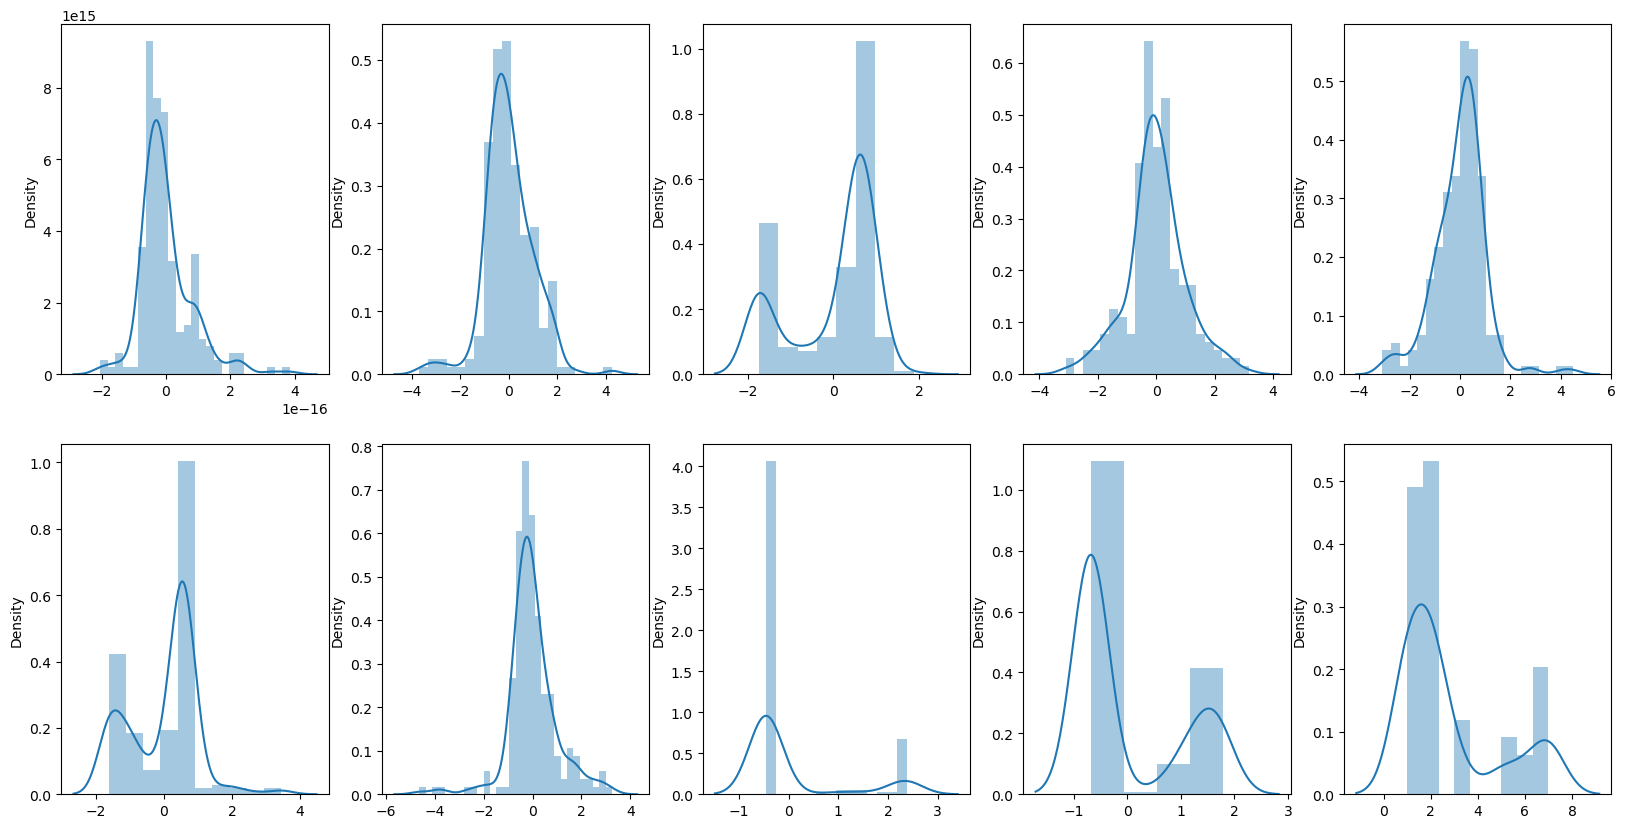

In [47]:
#check the skewness in the dataset using distplot
plt.figure(figsize=(20,10))
p=1
for i in transformeddf:
    if p<=10:
        plt.subplot(2,5,p)
        sns.distplot(transformeddf[i].values,kde=True)
    p=p+1
plt.show()

In [49]:
transformeddf.skew()

RI               0.000000
Na              -0.008973
Mg              -0.889528
Al               0.000219
Si               0.130384
K               -0.071816
Ca              -0.209314
Ba               1.824175
Fe               0.858508
Type of Glass    1.114915
dtype: float64

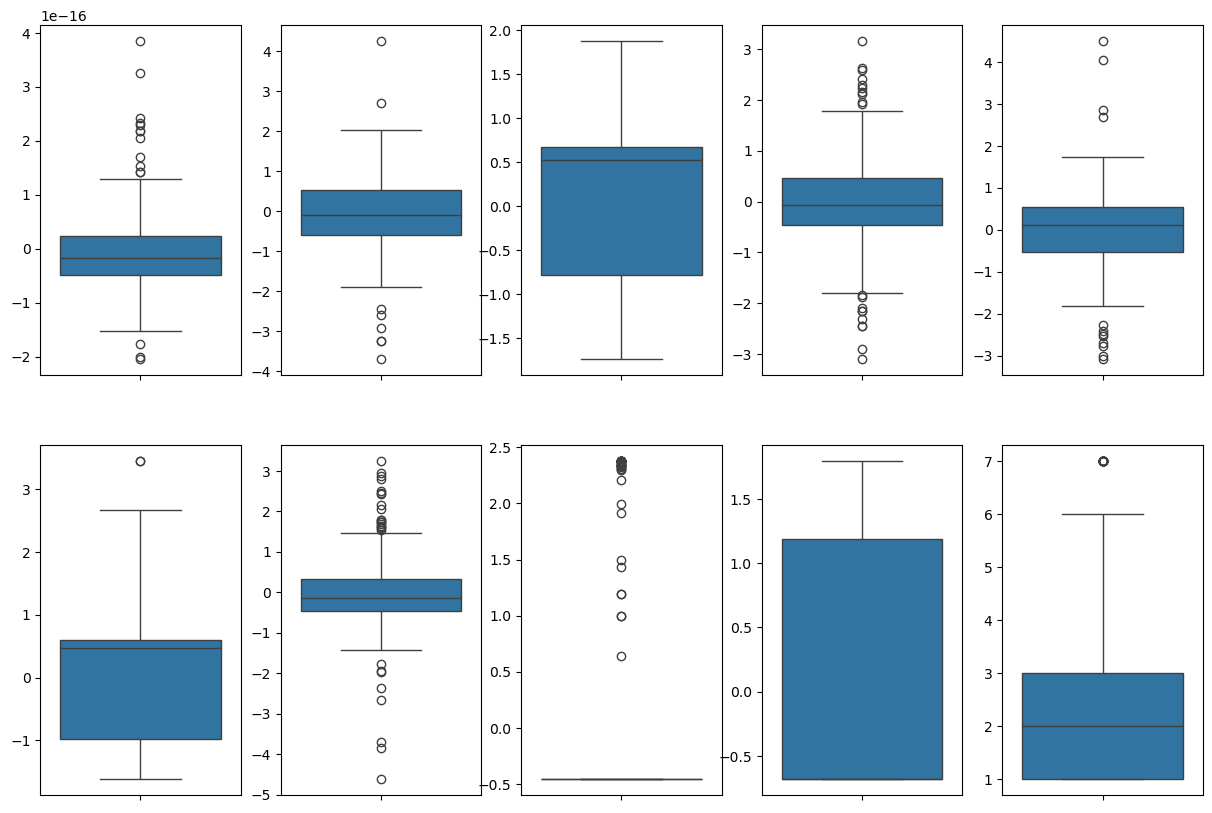

In [51]:
#check for the outliers in the dataset using boxplot
plt.figure(figsize=(15,10))
p=1
for i in transformeddf:
    if p<=10:
        plt.subplot(2,5,p)
        sns.boxplot(transformeddf[i].values)
    p=p+1
plt.show()

In [53]:
z=np.abs(zscore(transformeddf))
z

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,0.907736,0.317061,1.876273,0.662630,1.138642,1.289781,0.010654,0.454890,0.680015,0.848275
1,0.257279,0.616577,0.668163,0.077498,0.044314,0.274843,0.884532,0.454890,0.680015,0.848275
2,0.731915,0.183344,0.608046,0.291075,0.400267,0.018565,0.938251,0.454890,0.680015,0.848275
3,0.214131,0.212585,0.778426,0.228458,0.115117,0.501963,0.488967,0.454890,0.680015,0.848275
4,0.300428,0.137547,0.692438,0.339129,0.526911,0.453753,0.636365,0.454890,0.680015,0.848275
...,...,...,...,...,...,...,...,...,...,...
209,0.688767,0.910183,1.739289,2.417218,0.115117,1.187926,0.334634,2.371029,0.680015,2.010478
210,0.516172,1.790505,1.739289,1.109283,0.498613,1.619585,0.319385,2.376703,0.680015,2.010478
211,0.821439,1.163835,1.739289,1.159377,1.021794,1.619585,0.282733,2.376848,0.680015,2.010478
212,0.602469,1.186681,1.739289,1.024669,1.310019,1.619585,0.246446,2.376638,0.680015,2.010478


In [55]:
np.where(z>3)

(array([ 21, 106, 106, 106, 107, 107, 111, 112, 163, 163, 163, 166, 171,
        172, 184, 184, 185, 186, 201], dtype=int64),
 array([3, 0, 1, 4, 0, 6, 1, 0, 3, 4, 6, 1, 5, 5, 1, 4, 6, 6, 4],
       dtype=int64))

In [57]:
transformed_df=transformeddf[(z<=3).all(axis=1)]

In [59]:
transformed_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,7.285839e-17,0.317061,1.876273,-0.662630,-1.138642,-1.289781,-0.010654,-0.454890,-0.680015,1
1,-2.081668e-17,0.616577,0.668163,-0.077498,0.044314,0.274843,-0.884532,-0.454890,-0.680015,1
2,-5.898060e-17,0.183344,0.608046,0.291075,0.400267,0.018565,-0.938251,-0.454890,-0.680015,1
3,-1.734723e-17,-0.212585,0.778426,-0.228458,-0.115117,0.501963,-0.488967,-0.454890,-0.680015,1
4,-2.428613e-17,-0.137547,0.692438,-0.339129,0.526911,0.453753,-0.636365,-0.454890,-0.680015,1
...,...,...,...,...,...,...,...,...,...,...
209,-5.551115e-17,0.910183,-1.739289,2.417218,-0.115117,-1.187926,0.334634,2.371029,-0.680015,7
210,-4.163336e-17,1.790505,-1.739289,1.109283,0.498613,-1.619585,-0.319385,2.376703,-0.680015,7
211,6.591949e-17,1.163835,-1.739289,1.159377,1.021794,-1.619585,-0.282733,2.376848,-0.680015,7
212,-4.857226e-17,1.186681,-1.739289,1.024669,1.310019,-1.619585,-0.246446,2.376638,-0.680015,7


In [61]:
print("Percentage of data loss",((transformeddf.shape[0]-transformed_df.shape[0])/transformeddf.shape[0])* 100)

Percentage of data loss 6.074766355140187


In [63]:
transformdf.shape

(214, 9)

In [65]:
transformed_df.shape

(201, 10)

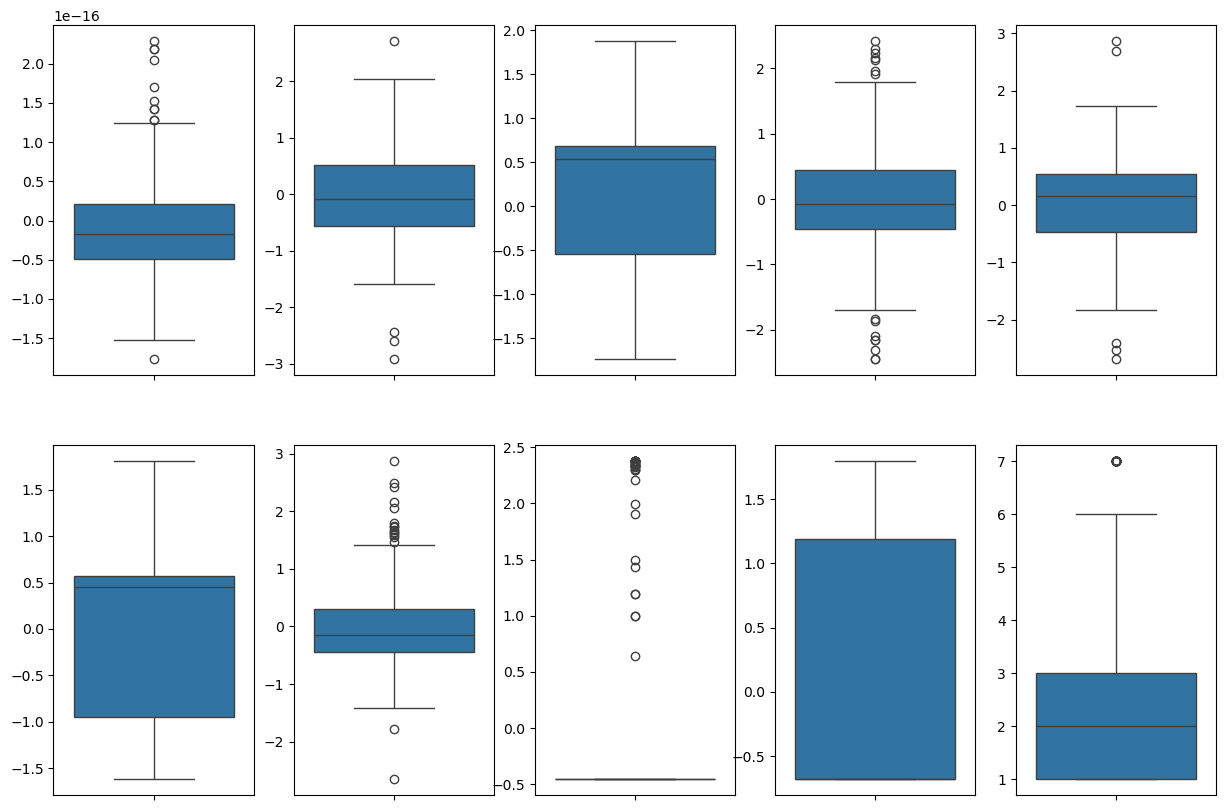

In [67]:
plt.figure(figsize=(15,10))
p=1
for i in transformed_df:
    if p<=10:
        plt.subplot(2,5,p)
        sns.boxplot(transformed_df[i].values)
    p=p+1
plt.show()

In [69]:
transformed_df['Type of Glass'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [71]:
transformed_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,7.285839e-17,0.317061,1.876273,-0.662630,-1.138642,-1.289781,-0.010654,-0.45489,-0.680015,1
1,-2.081668e-17,0.616577,0.668163,-0.077498,0.044314,0.274843,-0.884532,-0.45489,-0.680015,1
2,-5.898060e-17,0.183344,0.608046,0.291075,0.400267,0.018565,-0.938251,-0.45489,-0.680015,1
3,-1.734723e-17,-0.212585,0.778426,-0.228458,-0.115117,0.501963,-0.488967,-0.45489,-0.680015,1
4,-2.428613e-17,-0.137547,0.692438,-0.339129,0.526911,0.453753,-0.636365,-0.45489,-0.680015,1


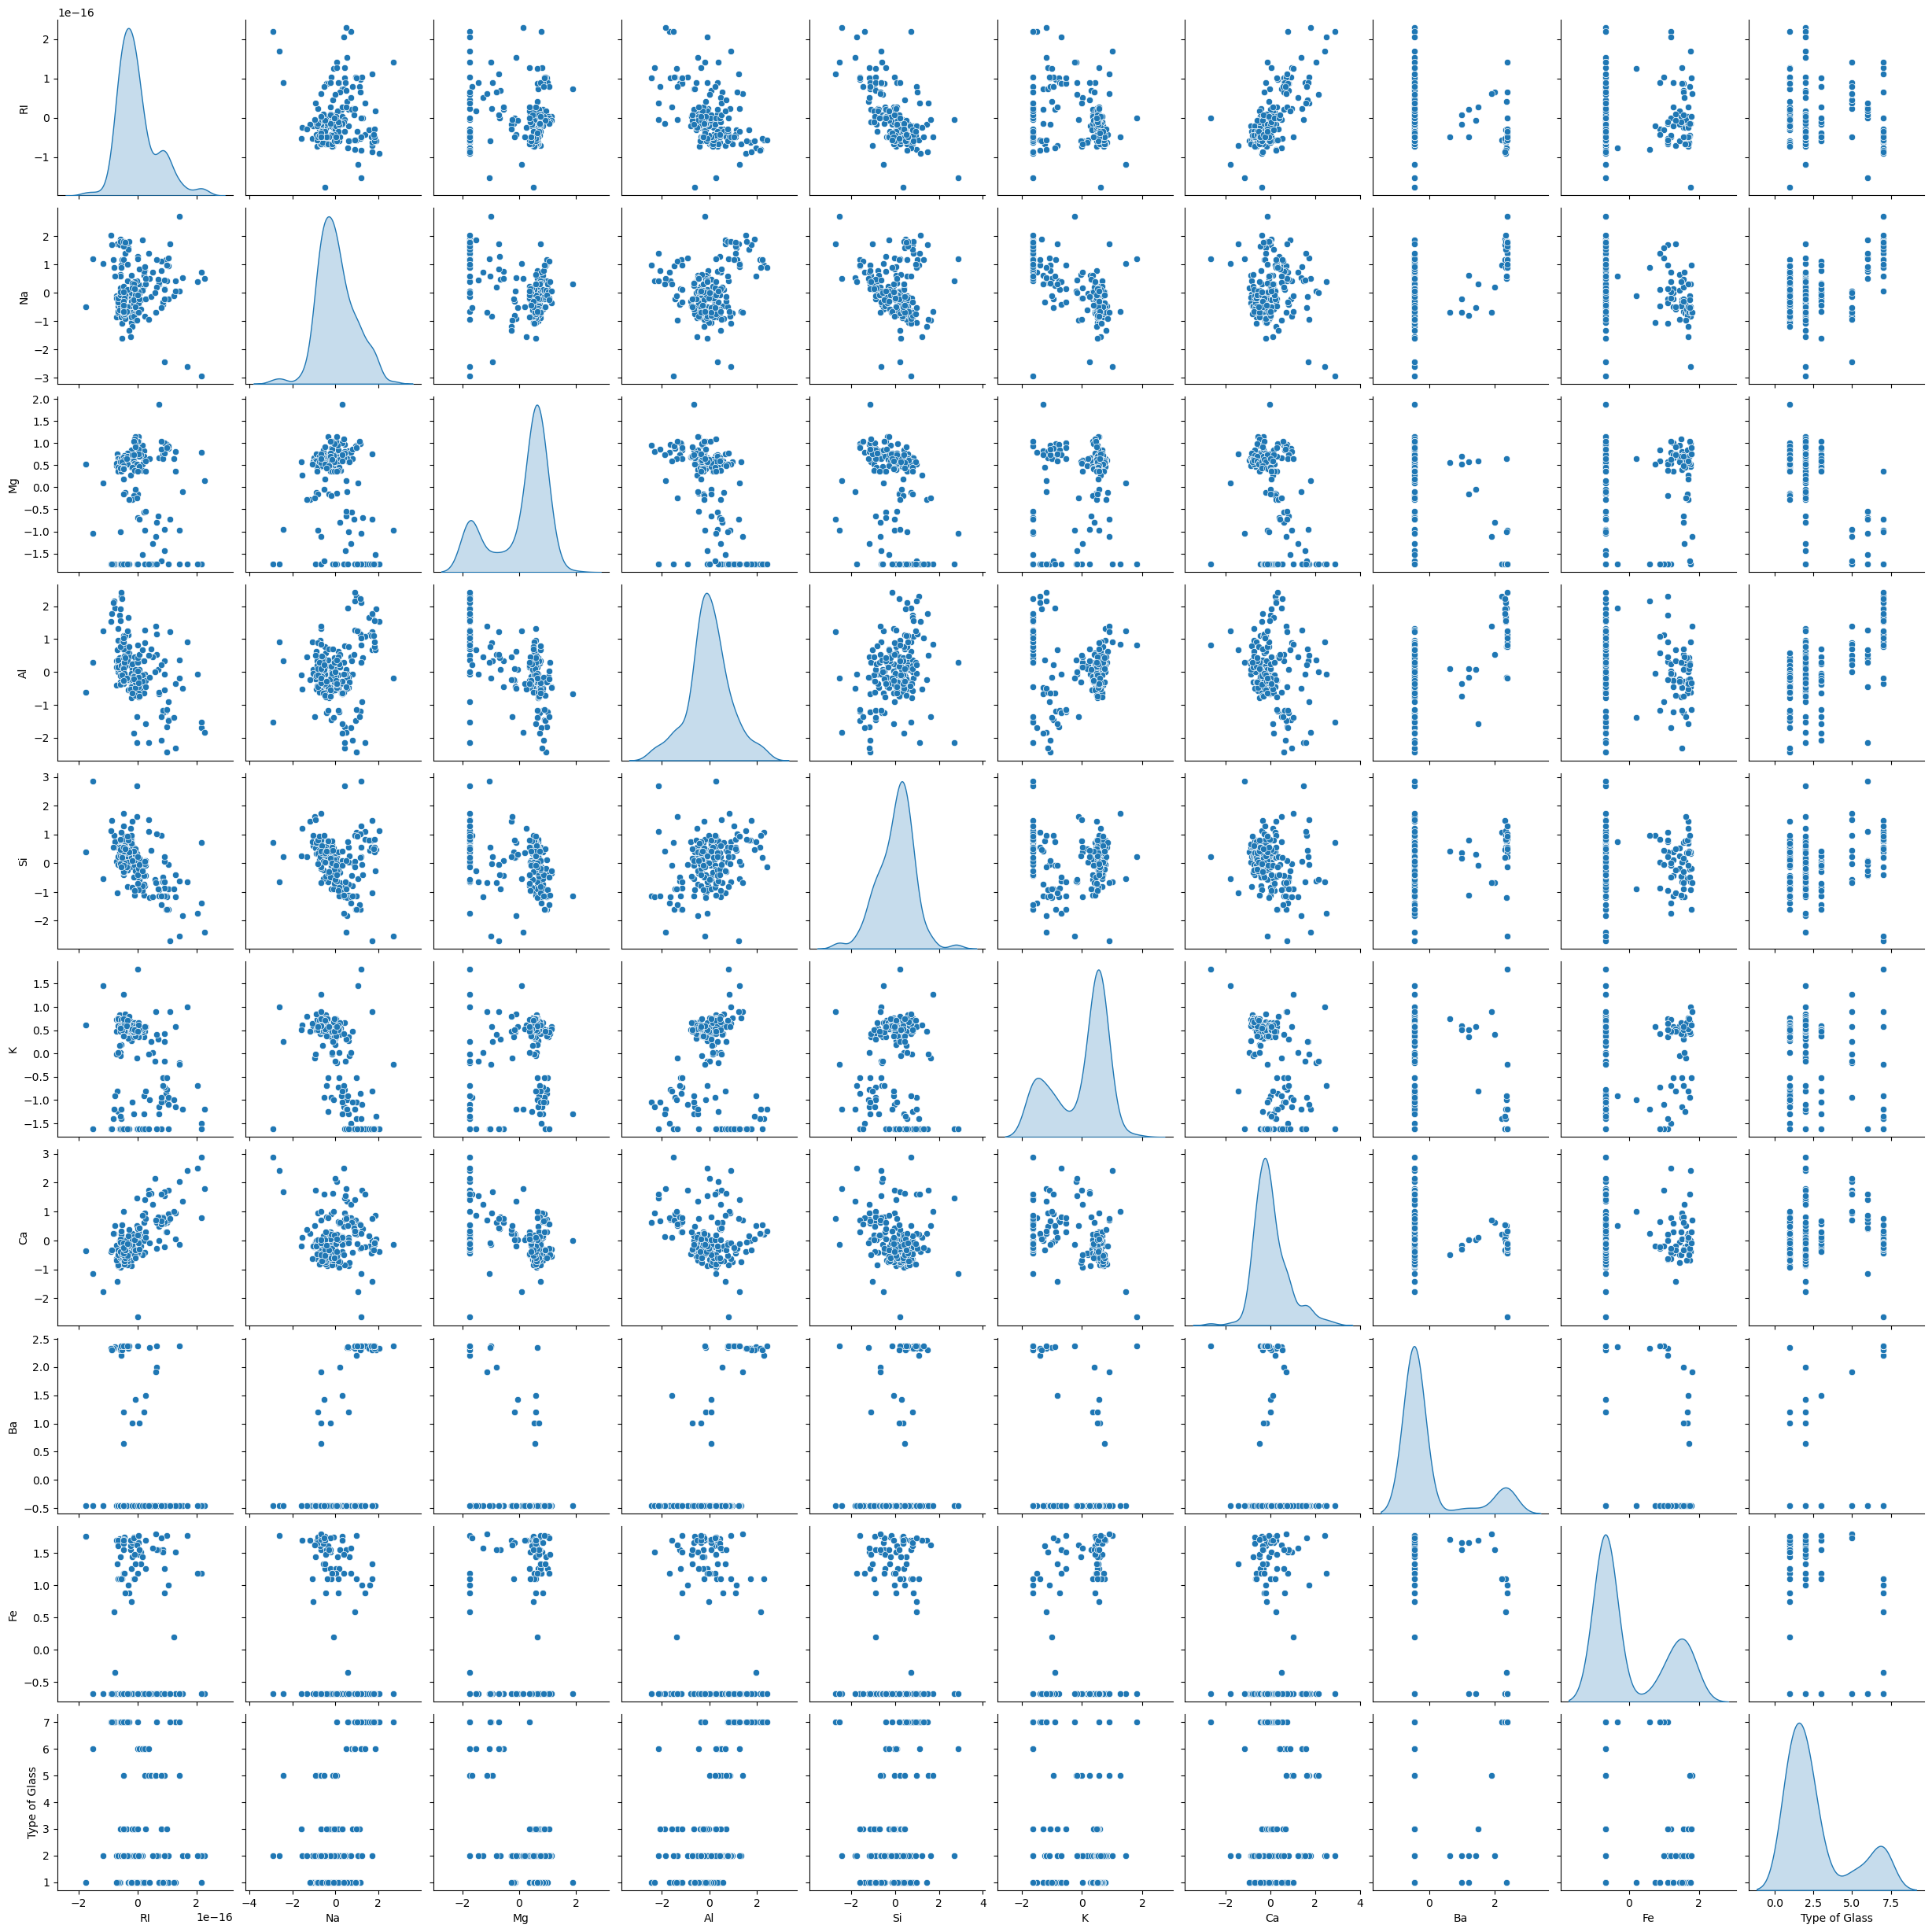

In [73]:
sns.pairplot(transformed_df,diag_kind='kde');

In [75]:
x=transformed_df.drop(columns='Type of Glass',axis=1)
x.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,7.285839e-17,0.317061,1.876273,-0.662630,-1.138642,-1.289781,-0.010654,-0.45489,-0.680015
1,-2.081668e-17,0.616577,0.668163,-0.077498,0.044314,0.274843,-0.884532,-0.45489,-0.680015
2,-5.898060e-17,0.183344,0.608046,0.291075,0.400267,0.018565,-0.938251,-0.45489,-0.680015
3,-1.734723e-17,-0.212585,0.778426,-0.228458,-0.115117,0.501963,-0.488967,-0.45489,-0.680015
4,-2.428613e-17,-0.137547,0.692438,-0.339129,0.526911,0.453753,-0.636365,-0.45489,-0.680015


In [77]:
y=transformed_df['Type of Glass']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Type of Glass, dtype: int64

In [79]:
#check for multicollinearity
def calc_vif(x):
    df=pd.DataFrame()
    df['column']=x.columns
    df['vif']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return df

In [81]:
calc_vif(x)    #we should not drop the columns as all the columns are important features for Glass identification

,column,vif
0,RI,5.557967
1,Na,5.532962
2,Mg,9.641397
3,Al,2.982680
4,Si,3.569640
5,K,4.068795
6,Ca,7.702515
7,Ba,2.930674
8,Fe,1.081224


In [83]:
y.value_counts()

Type of Glass
2    72
1    69
7    26
3    17
5     9
6     8
Name: count, dtype: int64

In [85]:
#balance the dataset using SMOTE
smt=SMOTE()
x_balanced,y_balanced=smt.fit_resample(x,y)

In [87]:
x_balanced.value_counts()

RI             Na         Mg         Al         Si         K          Ca         Ba         Fe       
 1.006140e-16   0.991362   0.942372  -2.449284  -1.150168  -1.041970   0.619363  -0.454890  -0.680015    3
 1.935298e-17   1.821105  -1.544331   0.399226  -0.126579  -1.619585   0.943065  -0.454890  -0.680015    1
 2.256864e-17   0.835014  -1.157229   0.807073  -0.181261  -1.619585   1.022112  -0.454890  -0.680015    1
 2.216943e-17   1.172565  -1.739289   1.107902   1.131932  -1.619585  -0.268867   2.376768  -0.680015    1
 2.146459e-17   0.723230  -0.561934   0.257326  -0.377462  -1.619585   0.632121  -0.454890  -0.680015    1
                                                                                                        ..
-3.469447e-17  -0.619240   0.692438   0.349962   0.358449   0.594819  -0.596499  -0.454890  -0.680015    1
-3.590424e-17   0.010281   0.406320  -0.109178  -0.241332   0.404881  -0.022479  -0.454890  -0.680015    1
-3.606642e-17   1.758069  -1.739289   1.11

In [89]:
y_balanced.value_counts()

Type of Glass
1    72
2    72
3    72
5    72
6    72
7    72
Name: count, dtype: int64

In [91]:
y_balanced.shape

(432,)

In [93]:
x_balanced.shape

(432, 9)

In [95]:
#standardscaler
sc=StandardScaler()
x_scaled=sc.fit_transform(x_balanced)
x_scaleddf=pd.DataFrame(x_scaled,columns=x_balanced.columns)
x_scaleddf

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.157611,0.097047,2.204475,-0.952951,-1.603934,-0.933943,-0.382515,-0.487594,-0.532513
1,-0.359297,0.407630,1.046756,-0.285362,-0.122234,0.661879,-1.451296,-0.487594,-0.532513
2,-0.977296,-0.041610,0.989147,0.135152,0.323611,0.400491,-1.516996,-0.487594,-0.532513
3,-0.303115,-0.452169,1.152420,-0.457594,-0.321928,0.893528,-0.967507,-0.487594,-0.532513
4,-0.415479,-0.374359,1.070018,-0.583862,0.482237,0.844356,-1.147780,-0.487594,-0.532513
...,...,...,...,...,...,...,...,...,...
427,-0.697964,1.211939,-1.260278,1.052858,0.861104,-1.270323,-0.625764,2.234618,1.335539
428,-0.534375,1.308662,-1.260278,1.648523,0.860005,-1.270323,-0.220076,2.201253,-0.532513
429,-0.898069,0.380928,-0.530951,0.638901,0.486141,-1.211948,-0.461666,2.141418,-0.532513
430,-0.606240,1.591301,-1.260278,1.071621,0.480712,-1.270323,-0.757782,2.234885,-0.532513


In [97]:
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
svc=SVC()
knn=KNeighborsClassifier()
ada=AdaBoostClassifier()
gbc=GradientBoostingClassifier()
bag=BaggingClassifier()
extra=ExtraTreesClassifier()

In [99]:
#cross validation 
models=[dtc,rfc,svc,knn,ada,gbc,bag,extra]
for i in models:
    cvs=cross_val_score(i,x_scaleddf,y_balanced,cv=5,scoring='accuracy',n_jobs=-1)
    print("Cross validation score for",i,"is",cvs,"\n mean of the cross validation is",np.mean(cvs),"\n")

Cross validation score for DecisionTreeClassifier() is [0.86206897 0.88505747 0.8372093  0.77906977 0.86046512] 
 mean of the cross validation is 0.8447741245656243 

Cross validation score for RandomForestClassifier() is [0.89655172 0.88505747 0.87209302 0.81395349 0.86046512] 
 mean of the cross validation is 0.8656241646618552 

Cross validation score for SVC() is [0.81609195 0.83908046 0.8372093  0.81395349 0.8372093 ] 
 mean of the cross validation is 0.8287089013632718 

Cross validation score for KNeighborsClassifier() is [0.83908046 0.7816092  0.77906977 0.8255814  0.8372093 ] 
 mean of the cross validation is 0.8125100240577385 

Cross validation score for AdaBoostClassifier() is [0.49425287 0.48275862 0.63953488 0.53488372 0.53488372] 
 mean of the cross validation is 0.5372627639668538 

Cross validation score for GradientBoostingClassifier() is [0.85057471 0.85057471 0.89534884 0.80232558 0.86046512] 
 mean of the cross validation is 0.8518577920342155 

Cross validation sc

In [101]:
#Get the best random state
maxacc=0
maxrs=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x_scaleddf,y_balanced,test_size=0.30,random_state=i)
    rfc.fit(x_train,y_train)
    y_pred=rfc.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print("Maximum accuracy",maxacc,"Maximum Random state",maxrs)

Maximum accuracy 0.9615384615384616 Maximum Random state 44


In [103]:
x_train,x_test,y_train,y_test=train_test_split(x_scaleddf,y_balanced,test_size=0.30,random_state=44)

In [105]:
x_train.shape

(302, 9)

In [107]:
x_test.shape

(130, 9)

In [109]:
y_train.shape

(302,)

In [111]:
y_test.shape

(130,)

In [113]:
for i in models:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    y_pred_train=i.predict(x_train)
    print("R-Score for",i, r2_score(y_train,y_pred_train))
    print("Accuracy Score for test data",i,accuracy_score(y_test,y_pred))
    print("Confusion Matrix for",i,confusion_matrix(y_test,y_pred),"\n")

R-Score for DecisionTreeClassifier() 1.0
Accuracy Score for test data DecisionTreeClassifier() 0.9384615384615385
Confusion Matrix for DecisionTreeClassifier() [[15  1  0  0  0  0]
 [ 2 15  2  0  0  1]
 [ 1  0 21  0  0  0]
 [ 0  0  0 26  0  0]
 [ 0  0  0  0 21  0]
 [ 1  0  0  0  0 24]] 

R-Score for RandomForestClassifier() 1.0
Accuracy Score for test data RandomForestClassifier() 0.9538461538461539
Confusion Matrix for RandomForestClassifier() [[16  0  0  0  0  0]
 [ 1 17  1  1  0  0]
 [ 1  1 20  0  0  0]
 [ 0  0  0 26  0  0]
 [ 0  0  0  0 21  0]
 [ 1  0  0  0  0 24]] 

R-Score for SVC() 0.965767637254471
Accuracy Score for test data SVC() 0.8846153846153846
Confusion Matrix for SVC() [[12  2  2  0  0  0]
 [ 3 16  0  1  0  0]
 [ 3  3 16  0  0  0]
 [ 0  0  0 26  0  0]
 [ 0  0  0  0 21  0]
 [ 1  0  0  0  0 24]] 

R-Score for KNeighborsClassifier() 0.9147684029601116
Accuracy Score for test data KNeighborsClassifier() 0.8461538461538461
Confusion Matrix for KNeighborsClassifier() [[13  0

In [115]:
#hyperparameter tuning for random forest classifier
param_grids={"criterion":["gini", "entropy", "log_loss"],"max_features":["sqrt", "log2", None],"bootstrap":[True,False],"warm_start":[True,False],"class_weight" : ["balanced", "balanced_subsample"],"ccp_alpha":[0.0001,0.1,0.001,0.01,0.00001]}

In [117]:
param_grids

{'criterion': ['gini', 'entropy', 'log_loss'],
 'max_features': ['sqrt', 'log2', None],
 'bootstrap': [True, False],
 'warm_start': [True, False],
 'class_weight': ['balanced', 'balanced_subsample'],
 'ccp_alpha': [0.0001, 0.1, 0.001, 0.01, 1e-05]}

In [119]:
gscv=GridSearchCV(rfc,param_grid=param_grids,cv=5,n_jobs=-1,scoring='accuracy')

In [121]:
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'ccp_alpha': [0.0001, 0.1, 0.001, 0.01, 1e-05],
                         'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2', None],
                         'warm_start': [True, False]},
             scoring='accuracy')

In [122]:
gscv.best_params_

{'bootstrap': False,
 'ccp_alpha': 0.01,
 'class_weight': 'balanced_subsample',
 'criterion': 'entropy',
 'max_features': 'log2',
 'warm_start': False}

In [125]:
rfc1=RandomForestClassifier(criterion='entropy',max_features='log2',bootstrap=False,warm_start=False,class_weight='balanced_subsample',ccp_alpha=0.01)
rfc1.fit(x_train,y_train)
y_predrfc=rfc1.predict(x_test)
y_pred_train=rfc1.predict(x_train)
y_predrfc

array([1, 1, 1, 5, 6, 7, 1, 1, 3, 7, 3, 2, 1, 1, 2, 6, 2, 6, 5, 7, 6, 5,
       3, 7, 6, 7, 7, 1, 5, 3, 7, 2, 6, 7, 5, 6, 7, 3, 2, 5, 3, 3, 6, 5,
       6, 5, 7, 2, 2, 5, 5, 3, 3, 5, 3, 6, 7, 2, 1, 3, 5, 5, 5, 3, 7, 7,
       5, 1, 1, 2, 2, 2, 7, 7, 2, 1, 7, 5, 6, 7, 7, 5, 7, 7, 2, 5, 3, 3,
       3, 6, 3, 2, 1, 2, 6, 1, 5, 6, 7, 1, 7, 2, 3, 6, 6, 7, 3, 3, 5, 6,
       3, 5, 5, 5, 7, 6, 3, 5, 6, 5, 1, 2, 1, 5, 1, 7, 1, 2, 6, 6],
      dtype=int64)

In [127]:
print("R-Score", r2_score(y_train,y_pred_train))
print("Accuracy Score for test data",accuracy_score(y_test,y_predrfc))
print("Confusion Matrix for",confusion_matrix(y_test,y_predrfc))

R-Score 1.0
Accuracy Score for test data 0.9538461538461539
Confusion Matrix for [[16  0  0  0  0  0]
 [ 1 17  1  0  0  1]
 [ 1  1 20  0  0  0]
 [ 0  0  0 26  0  0]
 [ 0  0  0  0 21  0]
 [ 1  0  0  0  0 24]]


In [129]:
#save the model
import pickle
filename='GlassIdentification.pkl'
pickle.dump(rfc1,open(filename,'wb'))

In [131]:
#Load the model
import pickle
rfcmodel=pickle.load(open('GlassIdentification.pkl','rb'))

In [133]:
model=rfcmodel.predict(x_test)
model

array([1, 1, 1, 5, 6, 7, 1, 1, 3, 7, 3, 2, 1, 1, 2, 6, 2, 6, 5, 7, 6, 5,
       3, 7, 6, 7, 7, 1, 5, 3, 7, 2, 6, 7, 5, 6, 7, 3, 2, 5, 3, 3, 6, 5,
       6, 5, 7, 2, 2, 5, 5, 3, 3, 5, 3, 6, 7, 2, 1, 3, 5, 5, 5, 3, 7, 7,
       5, 1, 1, 2, 2, 2, 7, 7, 2, 1, 7, 5, 6, 7, 7, 5, 7, 7, 2, 5, 3, 3,
       3, 6, 3, 2, 1, 2, 6, 1, 5, 6, 7, 1, 7, 2, 3, 6, 6, 7, 3, 3, 5, 6,
       3, 5, 5, 5, 7, 6, 3, 5, 6, 5, 1, 2, 1, 5, 1, 7, 1, 2, 6, 6],
      dtype=int64)

In [135]:
a=np.array(y_test)
df=pd.DataFrame()
df["Actual data"]=a
df["Predicted data"]=model
df

,Actual data,Predicted data
0,1,1
1,1,1
2,1,1
3,5,5
4,6,6
...,...,...
125,7,7
126,1,1
127,2,2
128,6,6
